# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### MLP

In [3]:
mlp_model = MLPClassifier(
    max_iter=500,
    random_state=RANDOM_STATE
)

In [5]:
param_distributions_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

In [6]:
df_mlp, model_mlp, params_mlp = runner.search_params(
    model=mlp_model,
    params=param_distributions_mlp,
    X_train=X_train,
    Y_train=Y_train,
    max_combinations=1000
)

Num combinações de hiperparâmetros: 432
Iniciando busca por hiperparâmetros...
Melhor conjunto de hiperparâmetros encontrado: {'solver': 'adam', 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'logistic'}
Tempo de busca: 90.11s


Cross-Validation (5-folds): 100%|██████████| 5/5 [00:37<00:00,  7.50s/it]


In [7]:
df_mlp

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
4,5,0.748001,0.744955,0.760502,0.757956,0.700991,0.696872,0.671980,0.665798,"[0.0, 0.1759788825340959, 1.0]","[0.0, 0.6719803801348866, 1.0]"
2,3,0.742352,0.743329,0.749488,0.750400,0.699816,0.701028,0.698958,0.700276,"[0.0, 0.21425428948526176, 1.0]","[0.0, 0.6989576946658492, 1.0]"
1,2,0.749253,0.740977,0.769723,0.762310,0.693905,0.682409,0.624387,0.611188,"[0.0, 0.12588028169014084, 1.0]","[0.0, 0.6243872549019608, 1.0]"
0,1,0.737222,0.744217,0.758259,0.765497,0.678035,0.686580,0.609069,0.614713,"[0.0, 0.13462384513858336, 1.0]","[0.0, 0.6090686274509803, 1.0]"
3,4,0.733307,0.741666,0.759221,0.766408,0.666430,0.678930,0.575720,0.591021,"[0.0, 0.10910690717113947, 1.0]","[0.0, 0.5757204169221337, 1.0]"


In [8]:
runner.save_model(model_mlp, "mlp")
runner.save_results(df_mlp, "mlp")

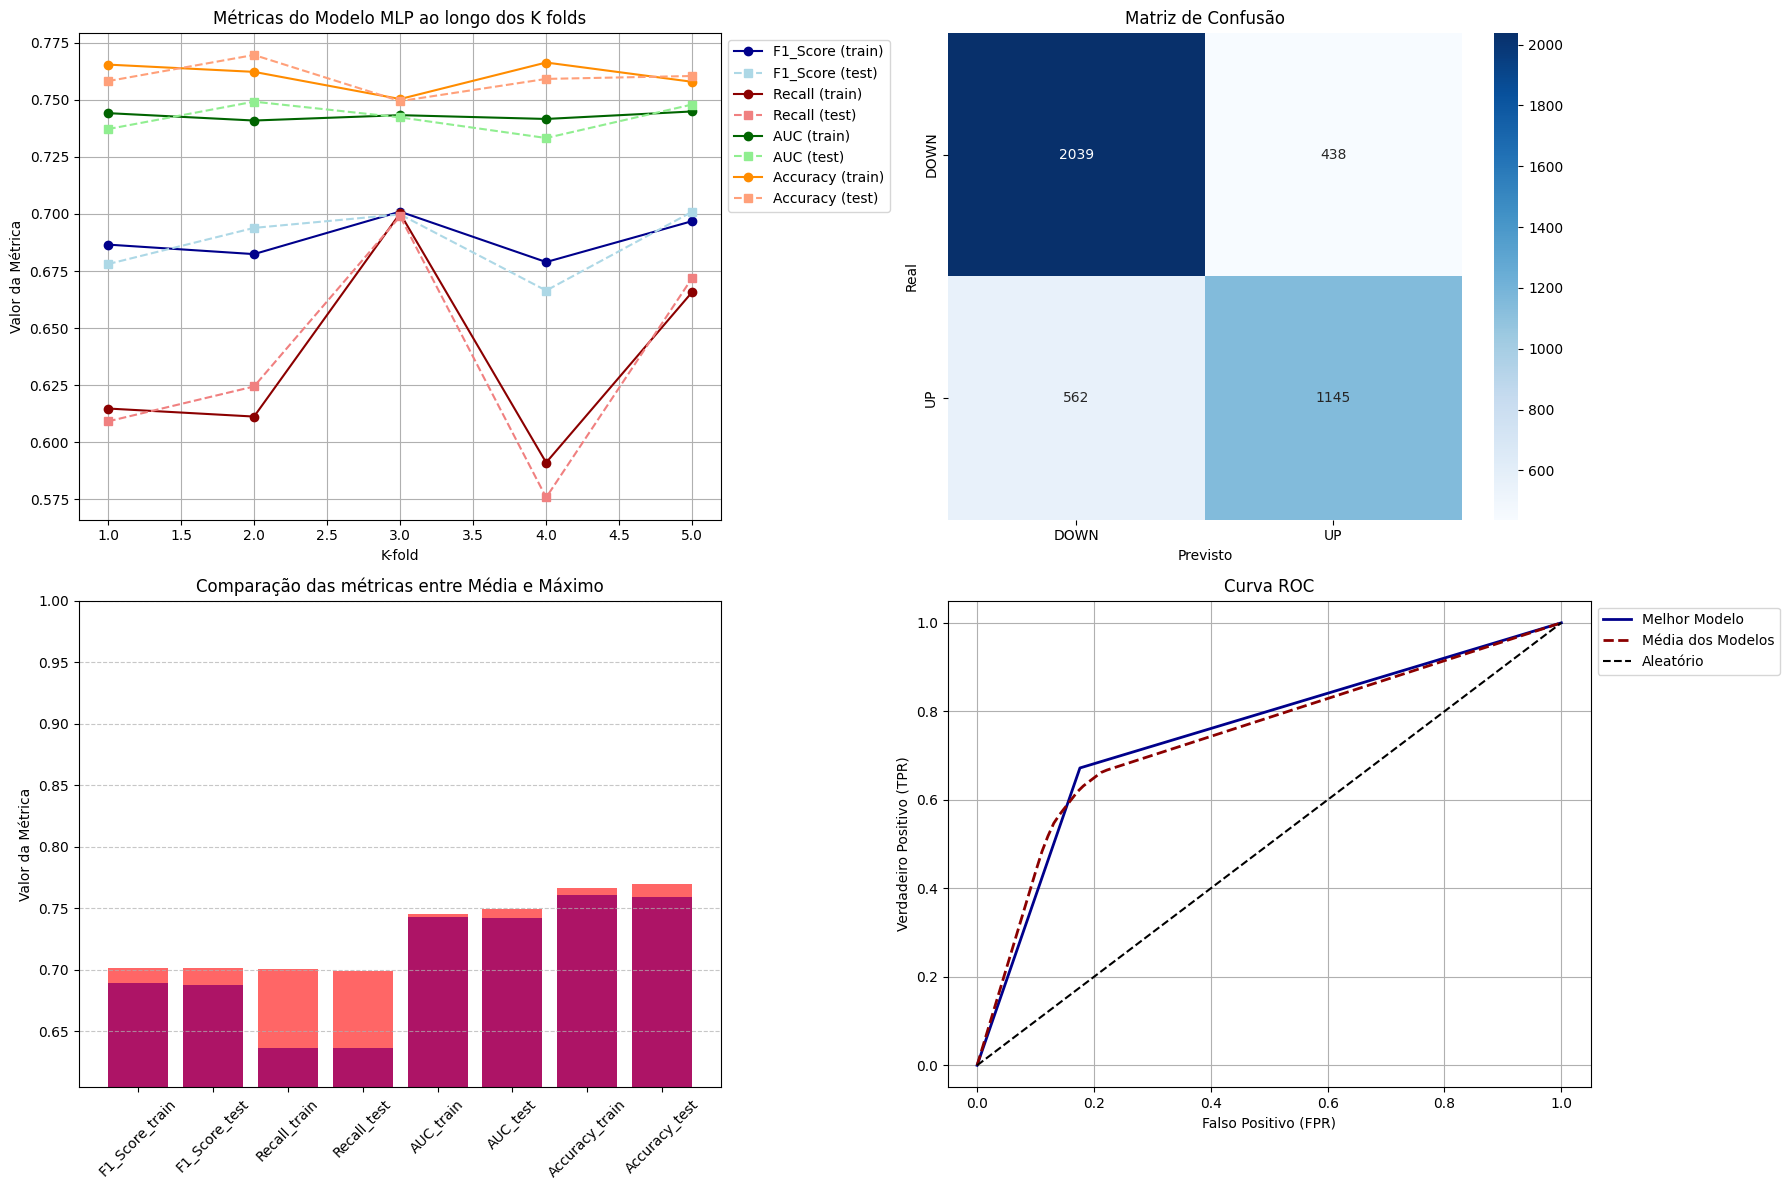

In [9]:
plots.model_evaluate(model_mlp, df_mlp, X_test, Y_test, model_name="MLP")